# Reddit AITA Dataset Analysis

In [ ]:
import matplotlib.pyplot as plt

In [23]:
from huggingface_hub import login

login()

In [24]:
from datasets import load_dataset

dataset = load_dataset("MattBoraske/Reddit-AITA-2018-to-2022")

Generating train split:   0%|          | 0/29339 [00:00<?, ? examples/s]

In [26]:
df = dataset['train'].to_pandas()
df.head(1)

top_comment_1_AITA_class_by_keyword
NTA    23148
YTA     4680
NAH      807
ESH      704
Name: count, dtype: int64


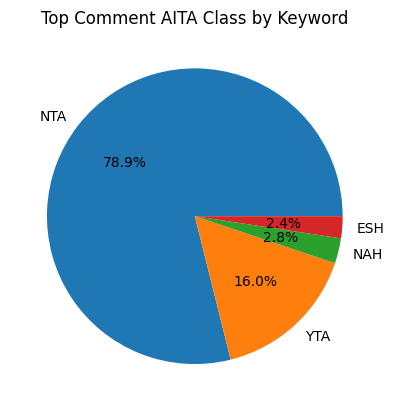

In [33]:
# get the number of samples in dataset by top comment AITA class
print(df['top_comment_1_AITA_class_by_keyword'].value_counts())

df['top_comment_1_AITA_class_by_keyword'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Top Comment AITA Class by Keyword')
plt.ylabel('')
plt.show()

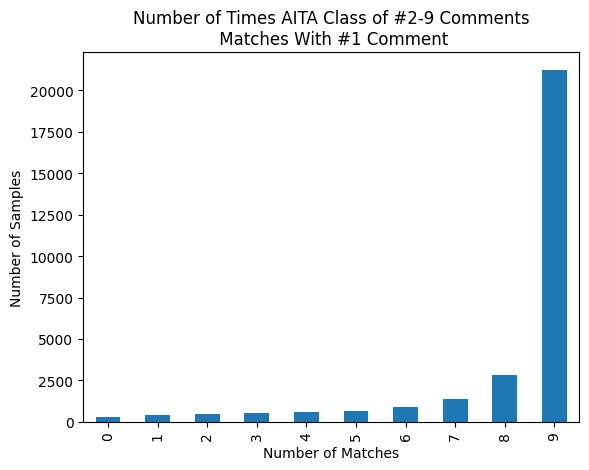

In [39]:
# calculate how times the AITA_class_by_keyword for each of the top 10 comments is the same
df['AITA_class_matches'] = df.apply(lambda x: sum([x[f'top_comment_{i}_AITA_class_by_keyword'] == x['top_comment_1_AITA_class_by_keyword'] for i in range(2, 11)]), axis=1)
print(df['AITA_class_matches'].value_counts())

df['AITA_class_matches'].value_counts().sort_index().plot.bar()
plt.title('Number of Times AITA Class of #2-9 Comments\n Matches With #1 Comment')
plt.xlabel('Number of Matches')
plt.ylabel('Number of Samples')
plt.show()